In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
resolution = 20

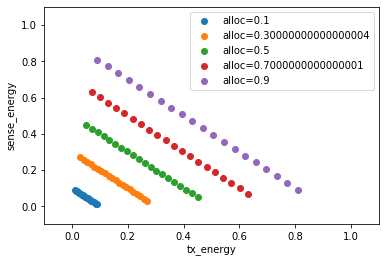

In [3]:
idx = np.arange(resolution)
alloc_range = np.linspace(start=0.1, stop=0.9, num=5)
for alloc in alloc_range:
    tx_dc = np.linspace(start=0.1, stop=0.9, num=resolution) * alloc
    sn_dc = alloc - tx_dc
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.xlabel("tx_energy")
    plt.ylabel("sense_energy")
    plt.scatter(tx_dc,sn_dc, label="alloc="+str(alloc))
    plt.legend()

In [4]:
def tx_prob(tx_power,ch_gain):
    k = 2
    diff = tx_power-ch_gain
    offset = 1
    x = diff+offset
    y = (1 + np.exp(-k*(1+offset))) / (1 + np.exp(-k*x)) 
    y = y*2-1.1
    y = np.clip(y,0,1)
    
    return np.where(tx_power<0.01,0,y)

In [5]:
def utility(sn_power,req):
    u = sn_power/req
    return np.where(u>1,1,u)

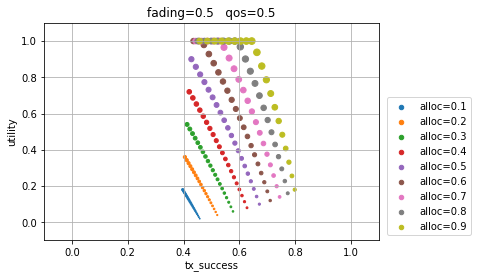

In [6]:
fading = 0.5
qos = 0.5
idx = np.arange(resolution)
alloc_range = np.linspace(start=0.1, stop=0.9, num=9)
for alloc in alloc_range:
    tx_dc = np.linspace(start=0.1, stop=0.9, num=resolution) * alloc
    sn_dc = alloc - tx_dc
    tx_success = tx_prob(tx_dc, ch_gain=fading)
    utilization = utility(sn_dc, qos)
    exp_utility = tx_success*utilization
    plt.scatter(tx_success,utilization, s=70*exp_utility, label="alloc="+str(np.around(alloc,2)))
    plt.xlim([-0.1,1.1])
    plt.ylim([-0.1,1.1])
    plt.xlabel("tx_success")
    plt.ylabel("utility")
    plt.grid()
    lgnd = plt.legend(loc='lower left', bbox_to_anchor=(1.01,0,5,5))
    plt.title("fading="+str(fading)+ "   "+"qos="+str(qos))
    for handle in lgnd.legendHandles:
        handle.set_sizes([20.0])

In [7]:
# fading = 0.5
# qos = 0.5
def pareto_plot(fading, qos):
    idx = np.arange(resolution)
    alloc_range = np.linspace(start=0.1, stop=1.0, num=9)
    fig, ax = plt.subplots(1,2,figsize=(15,6))
    for alloc in alloc_range:
        tx_dc = np.linspace(start=0.1, stop=0.9, num=resolution) * alloc
        sn_dc = alloc - tx_dc
        tx_success = tx_prob(tx_dc, ch_gain=fading)
        utilization = utility(sn_dc, qos)
        exp_utility = tx_success*utilization
        
        ax[0].scatter(tx_success,utilization, s=100*exp_utility, label="alloc="+str(np.around(alloc,2)))
        ax[0].set_xlim([-0.1,1.1])
        ax[0].set_ylim([-0.1,1.1])
        ax[0].set_xlabel("tx_success")
        ax[0].set_ylabel("utility")
        ax[0].grid()
        ax[0].set_title("fading="+str(fading)+ "   "+"req="+str(qos))

        
        ax[1].scatter(tx_dc,sn_dc, label="alloc="+str(np.around(alloc,2)))
        ax[1].set_xlim([-0.1,1.1])
        ax[1].set_ylim([-0.1,1.1])
        ax[1].set_xlabel("tx_dc")
        ax[1].set_ylabel("sn_dc")
        ax[1].grid()
        ax[1].set_title("Energy Proportion")

        lgnd = ax[1].legend(loc='lower left', bbox_to_anchor=(1.01,0,5,5))
        for handle in lgnd.legendHandles:
            handle.set_sizes([20.0])

In [8]:
%matplotlib inline
from ipywidgets import interactive

interactive_plot = interactive(pareto_plot,fading=(0.1, 0.9), qos=(0.1,0.9))
output = interactive_plot.children[-1]
output.layout.height = '500px'
interactive_plot

interactive(children=(FloatSlider(value=0.5, description='fading', max=0.9, min=0.1), FloatSlider(value=0.5, d…